# Correlated (multivariate) normal random variables

In [1]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

## Sigma (std) and correlation matrix

In [2]:
sig_v = np.array([2, 5, 2])
cor_m = np.array([[1, 0.7, -0.2], [0.7, 1, 0.5], [-0.2, 0.5, 1]])
print(sig_v, '\n', cor_m)

[2 5 2] 
 [[ 1.   0.7 -0.2]
 [ 0.7  1.   0.5]
 [-0.2  0.5  1. ]]


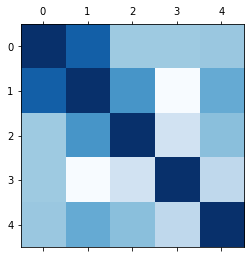

In [3]:
# You can also create random Correlation matrixs

n_asset = 5
eig_val = np.random.uniform(size=n_asset)
eig_val *= n_asset / np.sum(eig_val)
# sum of eig_val = n_asset

cor_m2 = spst.random_correlation.rvs(eig_val, tol=1e-8)
_ = plt.matshow(cor_m2, cmap=plt.cm.Blues)

### Construct Covariance Matrix

In [4]:
sig_v[:,None]

array([[2],
       [5],
       [2]])

In [5]:
sig_v[:,None] * sig_v * cor_m

array([[ 4. ,  7. , -0.8],
       [ 7. , 25. ,  5. ],
       [-0.8,  5. ,  4. ]])

In [6]:
cov_m = sig_v * cor_m * sig_v[:,None]
print(cov_m)

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]]


### Cholesky decomposition of covariance matrix

In [7]:
chol_m = np.linalg.cholesky(cov_m)
print(chol_m)

[[ 2.     0.     0.   ]
 [ 3.5    3.571  0.   ]
 [-0.4    1.792  0.792]]


In [8]:
# Let's verify that L x L^T = Covariance

print( chol_m @ chol_m.T, '\n' )
print( chol_m @ chol_m.T - cov_m )

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
# Now let's create multivariate normal random variables following the covariance matrix
# First, create standard normals (3 x 1000)

znorm_m = np.random.normal(size=(3, 1000))
znorm_m

array([[-2.061, -0.123, -1.635, ..., -0.662, -0.595,  1.032],
       [ 0.121,  0.808, -1.099, ..., -0.546,  0.561, -1.162],
       [-0.016, -0.771, -0.702, ..., -0.72 , -0.753, -0.704]])

In [10]:
np.round(np.cov(znorm_m),3)

array([[ 1.011,  0.002, -0.04 ],
       [ 0.002,  1.034,  0.02 ],
       [-0.04 ,  0.02 ,  1.064]])

In [11]:
# Then multiply C^T

#xnorm_m = znorm_m @ chol_m.transpose()
xnorm_m = chol_m @ znorm_m
xnorm_m

array([[-4.122, -0.245, -3.271, ..., -1.325, -1.191,  2.064],
       [-6.783,  2.457, -9.648, ..., -4.268, -0.079, -0.535],
       [ 1.027,  0.887, -1.872, ..., -1.284,  0.648, -3.053]])

In [12]:
# Let's verify that X = C * Z  follows the covariance
print(cov_m)
cov_m_sample = np.cov( xnorm_m )
print( 'Cov from sample:\n', cov_m_sample )
print( 'Error of Cov matrix:\n', cov_m_sample - cov_m )

[[ 4.   7.  -0.8]
 [ 7.  25.   5. ]
 [-0.8  5.   4. ]]
Cov from sample:
 [[ 4.045  7.089 -0.867]
 [ 7.089 25.605  5.152]
 [-0.867  5.152  4.229]]
Error of Cov matrix:
 [[ 0.045  0.089 -0.067]
 [ 0.089  0.605  0.152]
 [-0.067  0.152  0.229]]


In [13]:
# also check the correation
print(cor_m)
cor_m_sample = np.corrcoef( xnorm_m )
print( 'Corr from sample:\n', cor_m_sample )
print( 'Error:\n', cor_m_sample - cor_m )

[[ 1.   0.7 -0.2]
 [ 0.7  1.   0.5]
 [-0.2  0.5  1. ]]
Corr from sample:
 [[ 1.     0.697 -0.21 ]
 [ 0.697  1.     0.495]
 [-0.21   0.495  1.   ]]
Error:
 [[ 0.000e+00 -3.377e-03 -9.624e-03]
 [-3.377e-03  0.000e+00 -4.937e-03]
 [-9.624e-03 -4.937e-03 -2.220e-16]]
